## 3804ICT Data Mining
## Assignment 2: Project Report - KPrototype Code
#### Author: Kai Sato --- Wui Theam Wong -- Ken Quach

## I. Data Exploration

In [ ]:
import pandas as pd 
import numpy as np

df = pd.read_csv("combined_listings2.csv")

### Five number summary

In [ ]:
# Helper function to clean the price
import re
def clean_price(raw):
    clean_text = raw
    clean_text = re.sub("[^0123456789\.]","",clean_text)
    return clean_text

# df['price'] = pd.to_numeric(df['price'].apply(clean_price))
# df['price'].head(5)

In [ ]:
# Five number summary
import matplotlib.pyplot as plt
col = 'reviews_per_month'
example = df[col].head()
mean = np.mean(example)
print("Min: ", df[col].min())
print("Q1 : ", np.percentile(example, 25, interpolation = 'lower'))
print("Q2 : ", np.percentile(example, 50, interpolation = 'lower'))
print("Q3 : ", np.percentile(example, 75, interpolation = 'lower'))
print("Max: ", max(df[col]))
plt.boxplot(example)
plt.title(r'boxplot')
plt.show()

### Number of listings from Sydney and Melbourne


In [ ]:
df['location'].value_counts()

### Types of rental properties


In [ ]:
df['property_type'].value_counts()

### Number of hosts that have verification on Airbnb


In [ ]:
df['host_identity_verified'].value_counts()

### The first review of all listings


In [ ]:
# convert from str to datetime
date = pd.to_datetime(df['first_review'])
print("The first review of all listings: ", date.min())

In [ ]:
df['host_since'].value_counts()

## II. Visualisation

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

temp = df[['bedrooms']].copy()

temp = temp.dropna(subset=['bedrooms'])

temp['bedrooms'] = temp['bedrooms'].astype('int32')

print(temp.value_counts().head(19).sort_index())

temp.plot.hist(bins=100, bottom=0.001,title='Bedroom Frequency')

plt.show()

In [ ]:
temp = df[['price']].copy()


temp = temp.dropna(subset=['price'])
temp['price'] = temp['price'].replace('[\$,]', '', regex=True).astype(float)

print(temp.value_counts().sort_index(ascending=False))

temp.plot.hist(bins=100, bottom=0.01,title='price Frequency')

plt.show()

temp.plot.hist(bins=100, bottom=0.01,title='price Frequency with range',range=(0,1000))

plt.show()

In [ ]:
#Location
temp2 = df[['latitude','longitude','location']].copy()
temp2['latitude'] = temp2['latitude'].astype(float)
temp2['longitude'] = temp2['longitude'].astype(float)

print(temp2.head(10))

temp2[temp2['location'] == 'sydney'].plot.scatter(x = 'latitude', y ='longitude',title= "Sydney")
temp2[temp2['location'] =='melbourne'].plot.scatter(x = 'latitude', y ='longitude',title= "Melbourne" )
plt.show()

In [ ]:
temp = df[['amenities']].copy()

temp.value_counts()

array = []

amenities_total = {}
flag = False;
#go through all records
for listing in temp['amenities']:
    #go through all amenities in single listing
    listing = listing.split(",")
    for amenities in listing:
        #check for dups
        flag = False
        
        for amenitieslist in amenities_total:            
            if len(amenities.split('"')) > 1:
                if amenitieslist == amenities.split('"')[1]:
                    flag = True
        if len(amenities.split('"')) > 1:
            #if we found our amenities in the list than update total or add an item with count to 1
            
            if flag:                
                array.append(amenities.split('"')[1])
                amenities_total[amenities.split('"')[1]]= int(amenities_total[amenities.split('"')[1]]) + 1
            else:
                array.append(amenities.split('"')[1])
                amenities_total[amenities.split('"')[1]] = 1
            


In [ ]:
#

total = pd.Series(data=array)
total.value_counts().sort_values(ascending=False).head(15).plot(kind='pie',autopct='%1.1f%%')
plt.ylabel("")
plt.show()
print("total unique Amenities: "+str(len(amenities_total)))
print("-------")
print("Least used Amenities")
print(total.value_counts().sort_values(ascending=True).head(5))

In [ ]:
#avability
temp = df[['review_scores_rating']].copy()

temp.plot.hist(bins=100, bottom=0.01,title='Reviews')
plt.show()

## III. Data pre-processing


In [55]:
# Read in data as a pandas dataframe
import pandas as pd
df = pd.read_csv("combined_listings2.csv")
t = df[['id','name','description','neighborhood_overview','host_location','host_total_listings_count','host_identity_verified','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','bathrooms_text','bedrooms','beds','amenities','price','minimum_nights','maximum_nights','availability_30','availability_60','availability_90'
,'availability_365','number_of_reviews','number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location'
,'review_scores_value','instant_bookable','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','reviews_per_month','location']].copy()
df = t
df.dtypes

id                                                int64
name                                             object
description                                      object
neighborhood_overview                            object
host_location                                    object
host_total_listings_count                       float64
host_identity_verified                           object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64
beds                                            float64
amenities                                        object
price                                           

In [56]:
# Handle missing data
# Find which attributes have any missing data
df.isna().any()

id                                              False
name                                             True
description                                      True
neighborhood_overview                            True
host_location                                    True
host_total_listings_count                        True
host_identity_verified                           True
neighbourhood_cleansed                          False
latitude                                        False
longitude                                       False
property_type                                   False
room_type                                       False
accommodates                                    False
bathrooms_text                                   True
bedrooms                                         True
beds                                             True
amenities                                       False
price                                           False
minimum_nights              

In [57]:
# Show Amount of rows the data now has
df.shape

(51811, 43)

In [58]:
# Drop any duplicates in the data - if any exist
df = df.drop_duplicates()

# Show starting number of rows the dataset contains
df.shape

(51811, 43)

In [59]:
# Remove missing/incomplete data based on attributes where they should be removed.
# To ensure proper data cleaning the attributes: bathrooms_text, bedrooms, beds, 
# review_scores_rating, review_scores_accuracy, review_scores_cleanliness, first_review, last_review
# review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, and reviews_per_month.
# will have the any entries with NaN for these attributes removed.
# Without the values of the attribute the data is not usable for the algorithm and can negatively affect the results.
df = df.dropna(subset=['bathrooms_text','bedrooms','beds',
                       'review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                       'review_scores_checkin','review_scores_communication','review_scores_location',
                       'review_scores_value','reviews_per_month','first_review','last_review'])


# Format price to remove the dollar sign and commas
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].str.replace('$','',regex=False)
df['price'] = df['price'].str.replace(' ', '')

df.shape
# As shown by the output some missing/incomplete data was removed 
# to prevent these from negatively affecting the algorithm's results

(34914, 43)

In [60]:
# Check all the variables being cleaned to see if there are no empty attributes data entries
# these are different from NaN as the cell is completely empty -> If true these will be removed
print("Bathrooms:", df['bathrooms_text'].empty)
print("Bedrooms:", df['bedrooms'].empty)
print("Beds:", df['beds'].empty)
print("Rating:", df['review_scores_rating'].empty)
print("Accuracy:", df['review_scores_accuracy'].empty)
print("Cleanliness:", df['review_scores_cleanliness'].empty)
print("Checkin:", df['review_scores_checkin'].empty)
print("Communication:", df['review_scores_communication'].empty)
print("Location:", df['review_scores_location'].empty)
print("Value:", df['review_scores_value'].empty)
print("Reviews per month:", df['reviews_per_month'].empty)
print("First Reviews:", df['first_review'].empty)
print("Last Reviews:", df['last_review'].empty)

Bathrooms: False
Bedrooms: False
Beds: False
Rating: False
Accuracy: False
Cleanliness: False
Checkin: False
Communication: False
Location: False
Value: False
Reviews per month: False
First Reviews: False
Last Reviews: False


In [61]:
# Examine all the attributes for invalid data
# Check if Id is a valid number (greater than 0)
df = df[df['id'] >= 1]
# Total listing should be greater than or equal to 1
df = df[df['host_total_listings_count'] >= 1]
# Check the integer values related to the property - should be at least 1
df = df[df['bedrooms'] >= 1]
df = df[df['beds'] >= 1]

# Convert price from object to float
df = df.astype({'price': 'float64'})
# Check and remove negative numbered property listings
df = df[df['price'] >= 0]

# Minimum and Maximum nights must be at least 1
df = df[df['minimum_nights'] >= 1]
df = df[df['maximum_nights'] >= 1]

# Avaliability must be greater than or equal to 0 
df = df[df['availability_30'] >= 0]
df = df[df['availability_60'] >= 0]
df = df[df['availability_90'] >= 0]
df = df[df['availability_365'] >= 0]

# must also be no more than the number of days of their category 
# (avaliability_30 must not exceed 30 days)
df = df[df['availability_30'] <= 30]
df = df[df['availability_60'] <= 60]
df = df[df['availability_90'] <= 90]
df = df[df['availability_365'] <= 365]

# Number of reviews - should be greater than or equal to 0
df = df[df['number_of_reviews'] >= 0]
df = df[df['number_of_reviews_ltm'] >= 0]
df = df[df['number_of_reviews_l30d'] >= 0]

# Review scores - Check for incorrect values across all aspects
df = df[df['review_scores_rating'] >= 0]
df = df[df['review_scores_rating'] <= 100]

df = df[df['review_scores_accuracy'] >= 0]
df = df[df['review_scores_accuracy'] <= 10]

df = df[df['review_scores_cleanliness'] >= 0]
df = df[df['review_scores_cleanliness'] <= 10]

df = df[df['review_scores_checkin'] >= 0]
df = df[df['review_scores_checkin'] <= 10]

df = df[df['review_scores_communication'] >= 0]
df = df[df['review_scores_communication'] <= 10]

df = df[df['review_scores_location'] >= 0]
df = df[df['review_scores_location'] <= 10]

df = df[df['review_scores_value'] >= 0]
df = df[df['review_scores_value'] <= 10]

# Calculated host listings - check for invalid entries
df = df[df['calculated_host_listings_count'] >= 0]

df = df[df['calculated_host_listings_count_entire_homes'] >= 0]

df = df[df['calculated_host_listings_count_private_rooms'] >= 0]

df = df[df['calculated_host_listings_count_shared_rooms'] >= 0]

df = df[df['reviews_per_month'] >= 0]

# Print final amount of rows
df.shape

(31707, 43)

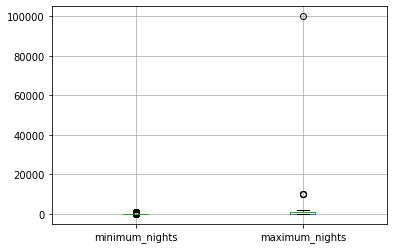

In [62]:
# Noisy Data
# From the attributes selected to be used in the algorithm - look for outliers
# Create boxplot to find minimum and maximum of the varaibles where outliers are most likely to exist
# this will determine if there are any outliers in the data
boxplot = df.boxplot(column=['minimum_nights', 'maximum_nights'])

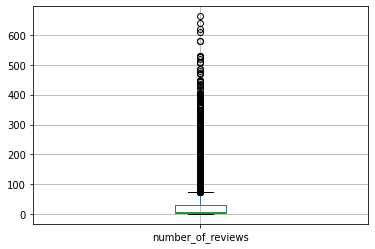

In [63]:
boxplot = df.boxplot(column=['number_of_reviews'])

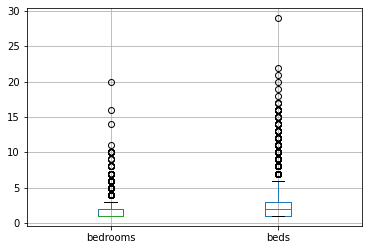

In [64]:
boxplot = df.boxplot(column=['bedrooms', 'beds'])

In [65]:
# From the five selected variables - use Z score to determine the outliers
# Create a list of all the variables
columns = list(df.columns)
# Remove all the attributes not being used (except for the five selected above)
columns.remove('id')
columns.remove('name')
columns.remove('description')
columns.remove('neighborhood_overview')
columns.remove('host_location')
columns.remove('host_total_listings_count')
columns.remove('host_identity_verified')
columns.remove('neighbourhood_cleansed')
columns.remove('latitude')
columns.remove('longitude')
columns.remove('property_type')
columns.remove('room_type')
columns.remove('accommodates')
columns.remove('bathrooms_text')
columns.remove('amenities')
columns.remove('price')
columns.remove('availability_30')
columns.remove('availability_60')
columns.remove('availability_90')
columns.remove('availability_365')
columns.remove('number_of_reviews_ltm')
columns.remove('number_of_reviews_l30d')
columns.remove('first_review')
columns.remove('last_review')
columns.remove('review_scores_rating')
columns.remove('review_scores_accuracy')
columns.remove('review_scores_cleanliness')
columns.remove('review_scores_checkin')
columns.remove('review_scores_communication')
columns.remove('review_scores_location')
columns.remove('review_scores_value')
columns.remove('instant_bookable')
columns.remove('calculated_host_listings_count')
columns.remove('calculated_host_listings_count_entire_homes')
columns.remove('calculated_host_listings_count_private_rooms')
columns.remove('calculated_host_listings_count_shared_rooms')
columns.remove('reviews_per_month')
columns.remove('location')

var = 0 # Counts the number of Z score columns created to prevent duplicate columns from being created (if code is run again)

df.shape


(31707, 43)

In [66]:
# Calculate Z Score for each variable and column creating a new column for each one
for column in columns:
    column_z_score = column + '_z_score'
    if var < 5: # If the five Z score columns haven't been made yet create them
        df[column_z_score] = (df[column] - df[column].mean())/df[column].std(ddof=0)
        var = var + 1
    
# Remove any rows of data in which the z score for any of them is three standard deviations away
# this is to only remove extreme outliers in the data (as seen with maximum number of nights)

df = df.loc[df['bedrooms_z_score'].abs() <= 3]

df = df.loc[df['beds_z_score'].abs() <= 3]

df = df.loc[df['minimum_nights_z_score'].abs() <= 3]

df = df.loc[df['maximum_nights_z_score'].abs() <= 3]

df = df.loc[df['number_of_reviews_z_score'].abs() <= 3]


df.shape

(29821, 48)

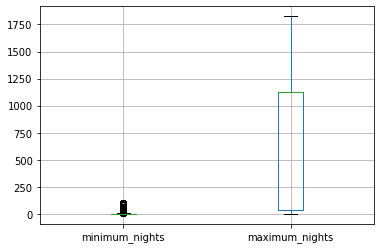

In [67]:
# Boxplot showing the data with extreme outliers removed
boxplot = df.boxplot(column=['minimum_nights','maximum_nights'])

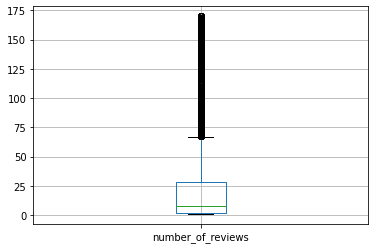

In [68]:
boxplot = df.boxplot(column=['number_of_reviews'])

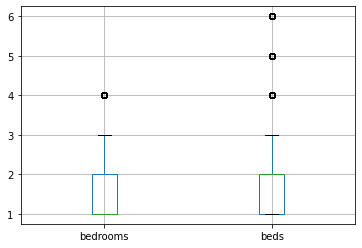

In [69]:
boxplot = df.boxplot(column=['bedrooms', 'beds'])

In [70]:
# Sanity Check -> ensure that one attribute links correctly with another (in the correct format)
# Convert first_review and last review to proper date/time format
df['first_review'] = pd.to_datetime(df['first_review'], format='%d/%m/%y')
df['last_review'] = pd.to_datetime(df['last_review'], format='%d/%m/%y')

# Perform sanity check - ensure that last_review is a date that is later than first_review
df = df.loc[df['first_review'] < df['last_review']]
df.shape

df.to_csv('combined_listings3.csv')

In [71]:
# List showing the variables used in the pre processing stage and the processing types performed:
'''
id                                                int64
name                                             object
description                                      object
neighborhood_overview                            object
host_location                                    object
host_total_listings_count                       float64
host_identity_verified                           object
neighbourhood_cleansed                           object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms_text                                   object
bedrooms                                        float64 Outlier 4
beds                                            float64 Outlier 5
amenities                                        object
price                                            object
minimum_nights                                    int64 Outlier 1
maximum_nights                                    int64 Outlier 2
availability_30                                   int64
availability_60                                   int64
availability_90                                   int64
availability_365                                  int64
number_of_reviews                                 int64 Outlier 3
number_of_reviews_ltm                             int64 
number_of_reviews_l30d                            int64
first_review                                     object Sanity Check 1 \/
last_review                                      object Sanity Check 1 /\
review_scores_rating                            float64
review_scores_accuracy                          float64
review_scores_cleanliness                       float64
review_scores_checkin                           float64
review_scores_communication                     float64
review_scores_location                          float64
review_scores_value                             float64
instant_bookable                                 object
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
location                                         object
'''
df.dtypes

id                                                       int64
name                                                    object
description                                             object
neighborhood_overview                                   object
host_location                                           object
host_total_listings_count                              float64
host_identity_verified                                  object
neighbourhood_cleansed                                  object
latitude                                               float64
longitude                                              float64
property_type                                           object
room_type                                               object
accommodates                                             int64
bathrooms_text                                          object
bedrooms                                               float64
beds                                                   

## Implementation of K-Prototypes Algorithm with cleaned dataset

In [72]:
# Create function for K-Prototype

def kprototype(*args):
    # Create new dataframe with the columns given as inputs
    arg = 0 # Number of arguments in the function
    dfk = pd.DataFrame() # Dataframe to use K prototype
    K = 0 # Number of clusters (K) - default is 0
    datatemp = pd.DataFrame()
    categoricalcolumns = [] # Store column number of where the cateogical values are
    numericalcolumns = []# Store column number of where the numerical values are
    for a in args: # Get the values of all the arguments given to the function
        if (arg == 0): # Load data given
            data = a
        if (arg == 1): # Load output list for the sum of square distance of each K
            outputlist = a
        if (arg == 2): # Get K value
            K = a
        if (arg > 2): # Load everythingg else as columns from the data given
            datatemp = data[a].copy()
            dfk = pd.concat([dfk,datatemp], axis=1)
        arg = arg + 1 # Increment arg counter
    # Get data types for every column
    currentcolumn = 0 # Count total number of columns
    for column in dfk.columns: # go througgh all the columns in the dataset
        currcolumn = dfk[column].dtype # Get the column data type
        if (currcolumn == 'int32'): # If int32 - numerical
            numericalcolumns.append(currentcolumn) # append numerical index value to numerical list
            
        if (currcolumn == 'int64'):# If int64 - numerical
            numericalcolumns.append(currentcolumn) # append numerical index value to numerical list
            
        if (currcolumn == 'float32'): # If float32 - numerical
            numericalcolumns.append(currentcolumn) # append numerical index value to numerical list
            
        if (currcolumn == 'float64'): # If float64 - numerical
            numericalcolumns.append(currentcolumn) # append numerical index value to numerical list
            
        # Otherwise - the attribute is categorical
        elif (currcolumn != 'int64') or (currcolumn == 'int32') or (currcolumn == 'float64') or (currcolumn == 'float32'):
            categoricalcolumns.append(currentcolumn) # append categorical index value to categorical list
        currentcolumn = currentcolumn + 1 # Increment column number - move to the next one
    
    # Display values and column types
    print("----------------------------------------------------------------------------------------------------------------")
    print("K value:", K)
    print("Column Types (Index based on order of input):\n")
    print("Categorical columns:" , categoricalcolumns)
    print("Numerical columns:" , numericalcolumns)
    
    # Starting with given K value - find starting K clusters
    # Starting clusters are defined as all attributes are distinct from one another
    clustercentroids = pd.DataFrame(columns = dfk.columns) # Store K number of cluster centoids - maintain attributes from main data
    for i, row in dfk.iterrows(): # Go through all rows in the data
        if(clustercentroids.shape[0] == 0): # If no cluster centers yet - get first row
            clustercentroids = clustercentroids.append(row)
        # Compare next rows until K number of clusters - all columns should be different
        elif (clustercentroids.shape[0] != 0) and (clustercentroids.shape[0] < K): # If less than K clusters get more rows
            distinct = True # defines if a row is distinct
            for c, clusterrow in clustercentroids.iterrows(): # Iterate through found cluster rows
                # Iterate through both rows values
                datacol = list(row) # Get values of current row in data
                clustercol = list(clusterrow) # get values in current cluster row
                for col in range(0,currentcolumn): # Go through each column and compare
                    if (datacol[col] == clustercol[col]): # If row matches any of the clusters attributes - not distinct
                        distinct = False # False - do not add to clusters
            if (distinct == True):  # If Row has no matchingg values from any existing defined clusters - it is distinct
                clustercentroids = clustercentroids.append(row) # add to clusters
                
                
    # If the algorithm is unable to find K cluster distinct rows - begin search for less-distinct rows (some values may be not distinct)
    maxsimilarities = dfk.shape[1] - 1 # Defines the maximum number of differences a new cluster can have to other clusters before being added
    # Max similarities must always have at least on attribute be unique
    if clustercentroids.shape[0] < K: # If number of clusters that are distinct are less than K - get less distinct rows
        while clustercentroids.shape[0] < K: # While less than K clusters
            for i, row in dfk.iterrows(): # Go through every data row
                if clustercentroids.shape[0] < K: # If still less than K clusters found
                    similarities = 0 # Count similarities to current clusters found
                    for c, clusterrow in clustercentroids.iterrows(): # Iterate through current clusters
                        datacol = list(row) # Get values of current row in data
                        clustercol = list(clusterrow) # get values in current cluster row
                        for col in range(0,currentcolumn): # Go through columns of both rows (data and clusters)
                            if (datacol[col] == clustercol[col]): # if same values - add 1 to similarities
                                similarities = similarities + 1
                    if (similarities <= maxsimilarities): # If ony one similaritiy - add to clusters
                        clustercentroids = clustercentroids.append(row)
                
    
    
    pd.set_option("display.max_colwidth", None, 'display.max_rows', None) # Display all columns and rows
    print("STARTING CLUSTERS:\n",clustercentroids) # Print starting clusters and their values in each attribute
        
        
    loopcount = 1 # counts and displays current iteration of the loop
    cont = True # continue looping until clusters do not change
    while cont == True: # while final cluster values are still not found - keep looping
        # Start going through data - determining distance and assign clusters to each of them
        rowcount = 1 # count current row in dataset
        dfk['Cluster'] = "0" # Start all with "blank(0)" cluster identifier
        for i, row in dfk.iterrows(): # GGgo through each row of the data
            clusterID = [] # Keep track of cluster ID
            clusterScore = [] # Store the density (number of points) in the cluster
            for currentcluster in range(1,K+1): # Iterate through all the clusters - create/assign the IDs (1 to K)
                clusterID.append(currentcluster)
                clusterScore.append(0) # Default cluster density is 0
                
            currentcluster = 0 # keep track of current cluster when searchiing for closest cluster to current row of data
            roweval = 0  # Current attribute column being evaluated
            rowcounter = len(numericalcolumns) # max number of numerical attributes
            for c, clusterrow in clustercentroids.iterrows():
                # Iterate through both rows and columns values - increment score of cluster by one for every matching/closest attribute
                # Compare categorical columns
                for cat in categoricalcolumns:
                    if(row[cat] == clusterrow[cat]): # If both are equal - increment similarity to that cluster
                        clusterScore[currentcluster] = clusterScore[currentcluster] + 1
                # Compare numerical columns - Find closest ones to increment similarity score to that cluster
                for num in numericalcolumns:
                    closestcluster = 0 # closest cluster found - default is 0
                    closestdistance = 0 # closest distance to cluster - default is 0
                    dist = 0 # distance calculate between row of data and current cluster
                    curcluster = 1 # Id for current cluster the search is at
                    # Find the closest cluster in the column of clusters
                    for cv, cr in clustercentroids.iterrows(): # iterate through all cluster values
                        if (dist == 0): # If first cluster row - set as current closest value
                            closestcluster = curcluster # set starting closest cluster
                            dist = abs(row[num] - cr[num]) # calculate distance
                            closestdistance = dist # set starting distance
                        if (dist != 0): # Otherwise check for next closest value
                            dist = abs(row[num] - cr[num]) # calculate distance
                            if (dist < closestdistance): # if closer than previous closest cluster - set as closest
                                closestdistance = dist
                                closestcluster = curcluster
                        curcluster = curcluster + 1 # increment cluster counter
                    # Start incrementing cluster scores depending on closest cluster found
                    if (roweval < rowcounter): # Move left along row of data - checking all numerical attributes
                        for d in clusterID: # Increment until closest cluster is identified
                            if (d == closestcluster): # If found closest cluster value:
                                clusterScore[d-1] = clusterScore[d-1] + 1 # As clusters will always be in numerical order - minus one equals position - add 1
                        roweval = roweval + 1 # increment row eval counter - move to next column in the row
                currentcluster = currentcluster + 1 # Move to next cluster row to evaluate categorical values
                
                
            # Determine closest cluster based on values found
            bestscore = 0 # Cluster with best score is the closest to the current row of data
            bestcluster = 0 # Best cluster based on which cluster has the highest similarity to row of data
            currentclustercount = 1 
            for bc in clusterScore: # Look for the best cluster based on the best score - closest distance
                if (bc > bestscore): # If bc has a higher similarity than the current best score
                    bestscore = bc
                    bestcluster = currentclustercount
                currentclustercount = currentclustercount + 1
            # Add best cluster to dataframe
            dfk.at[i,'Cluster'] = bestcluster # assign closest cluster found to that row
            rowcount = rowcount + 1 # Increment to next row of the dataset
        # With the clusters for each row identified - update the cluster centers
        # Create a copy of the clusters to be compared with new calculate cluster centroids
        currentcentroids = clustercentroids.copy()
        
        
        # Calculate new cluster centers
        # Create new dataframe from list of column names enter to make columns
        columnnames = [] # Get column names
        for column in dfk.columns: # Iterate through all columns except cluster column
            if (column != 'Cluster'):
                columnnames.append(column)
        # Create new dataframe to store the updated cluster values using the column names found
        newclustercentroids = pd.DataFrame(columns=columnnames) 
        # Count number of data points for each cluster - store in list
        clustercounts = []
        for currentk in range(1,K+1): # iterate through all clusters
            dfkc = dfk.loc[dfk['Cluster'] == currentk] # get all rows of data which belong to current cluster
            clustercount = dfkc.shape[0] # Get number of rows
            clustercounts.append(clustercount) # save number of data points in the cluster
            
            if(clustercount == 0): # If no data points in cluster - dont change any attributes
                newclusterrow = [] # Store the row of new attributes for the cluster
                for clusterarow in range(0,currentcentroids.shape[1]):
                    newclusterrow.append(currentcentroids.iloc[currentk-1,clusterarow])
                newclustercentroids.loc[len(newclustercentroids)] = newclusterrow
            
            if(clustercount != 0): # If cluster has data points - update attributes of cluster center
                # Create a list - calculate all column attribute for next cluster 
                currentattribute = 0
                newclusterrow = [] # Store the row of new attributes for the cluster
                for attribute in newclustercentroids.columns: # Search all columns in the data
                    if currentattribute in categoricalcolumns: # If column is categorical
                        attributevalue = dfkc[attribute].mode() # Get mode of the categorical column
                        attributevalue = str(attributevalue)
                        # Remove excess string elements not related to column
                        attributevalue = attributevalue[5:]
                        attributevalue = attributevalue.replace('\ndtype: object','')
                        # Add to list
                        newclusterrow.append(attributevalue)
                    if currentattribute in numericalcolumns:  # If column is numerical
                        attributevalue = dfkc[attribute].mean() # Get mean of the numerical column
                        # Add to list
                        newclusterrow.append(attributevalue)
                    currentattribute = currentattribute + 1 # Move to next attribute
                # append list to dataframe
                newclustercentroids.loc[len(newclustercentroids)] = newclusterrow
            
        # Perform error check - should any invalid attributes in the data exist - revert to previous cluster value
        
        # Get columns and associated column number - used for error checking
        currentcolumn = []
        for clusterattribute in newclustercentroids.columns:
            if clusterattribute != 'Cluster':
                currentcolumn.append(clusterattribute)
        
        for currentcrow in range(0,K): # iterate through all clusters
            for numc in numericalcolumns: # Go through numerical attributes
                if pd.isna(newclustercentroids.iloc[currentcrow, numc]) == True: # Check if NaN
                    newclustercentroids.at[currentcrow, currentcolumn[numc]]  = currentcentroids.iloc[currentcrow, numc]
            for catc in categoricalcolumns: # Go through all columns
                if 's([], dtype: object)' in newclustercentroids.iloc[currentcrow, catc]:# If invalid string - revert
                    newclustercentroids.at[currentcrow, currentcolumn[catc]]  = currentcentroids.iloc[currentcrow, catc]
                if '[]' in newclustercentroids.iloc[currentcrow, catc]: # If empty string - revert
                    newclustercentroids.at[currentcrow, currentcolumn[catc]]  = currentcentroids.iloc[currentcrow, catc]
                    
        # Update clustercentoids to new ones
        clustercentroids = newclustercentroids
        #Compare with currentcentoids
        print("\nIteration:", loopcount)
        loopcount = loopcount + 1
        print("Current clusters:\n", currentcentroids)
        print("New clusters:\n", clustercentroids)
        for count in range(0,len(clustercounts)): # Print cluster number/ID and density of the cluster
            print("Cluster:", count + 1, " | ", "Cluster density:", clustercounts[count])
        if (clustercentroids.equals(currentcentroids) == True): # No new changes - stop
            cont = False
            print("No new changes found - stopping to calculate total sum of square distance\n")
            # Calculate the clusters sum of square distance
            clustersumsquare = 0 # total cluster sum square distance inside each cluster added together - default is 0
            for currentkd in range(1,K+1): # go through each cluster
                dfkcd = dfk.loc[dfk['Cluster'] == currentkd] # Get all rows which are a part of current cluster
                clustercenter = clustercentroids.iloc[currentkd-1] # Get matching cluster
                for data, currentdatarow in dfkcd.iterrows(): # Go through every row of the data (of the matching cluster)
                    for a in categoricalcolumns: # Determine distance for categorical values
                        categoricaldistance = dfk.iloc[:,a].nunique() # Count number of unique possible values in the attribute
                        if (currentdatarow[a] != clustercenter[a]): # If different to cluster
                            clustersumsquare = clustersumsquare + (categoricaldistance - 1) # add number of possible attributes minus one
                            # distance for categorical attributes is the other values which are not the attribute of the cluster
                    for b in numericalcolumns: # Determine euclidean distance for numerical values
                        dist = clustercenter[b] - currentdatarow[b] # Get difference
                        dist = dist * dist # Square result
                        clustersumsquare = clustersumsquare + dist # add to current distance inside cluster
            finalresult = clustersumsquare**(1/2) # Square root  all the sum of sqaure distances to get the final result
            outputlist.append(finalresult) # Append final result to outputlists
            pd.set_option('display.max_colwidth', None, 'display.max_rows', None) # Display all columns and rows
            print(clustercentroids)
            print("Final total sum of square distance for K=", K, ":", finalresult) # Display final result computed of current K clusters
                    
        if (clustercentroids.equals(currentcentroids) == False): # If changes - continue going through data to update cluster attributes
            print("Changes found - continuing to calculate next cluster values (attribute mean/mode)\n")


In [47]:
import time # To find time of function
# Call K prototype with given attributes
# Input should be the data, k value, and any attributes that are within the dataset (must be valid inputs)
# Lists to store sum of square distance values of each K value
kvalue = []
sumofsquaredistance = []

starttime = time.time()
# Iterate from 2 to 8 K clusters (default k ranges examined) to find which K is best for the data
for iterate in range(2,9):
    kprototype(df, sumofsquaredistance, iterate, "accommodates", "bathrooms_text", "bedrooms", "beds", "amenities")
    kvalue.append(iterate)
print("K-PROTOTYPE COMPLETED, THE FOLLOWING TOTAL DISTANCES FOR EACH K CLUSTER WERE FOUND:")
print("K:", kvalue)
print("Sum of square distances:", sumofsquaredistance)
endtime = time.time()
print("Time for implemented kprototype to find optimal K was:", endtime - starttime)


----------------------------------------------------------------------------------------------------------------
K value: 2
Column Types (Index based on order of input):

Categorical columns: [1, 4]
Numerical columns: [0, 2, 3]
STARTING CLUSTERS:
    accommodates bathrooms_text  bedrooms  beds  \
0             2         1 bath       1.0   2.0   
31            5        3 baths       2.0   4.0   

                                            amenities  
0                                            ["Wifi"]  
31  ["Stove", "TV", "Host greets you", "Dishes and...  

Iteration: 1
Current clusters:
    accommodates bathrooms_text  bedrooms  beds  \
0             2         1 bath       1.0   2.0   
31            5        3 baths       2.0   4.0   

                                            amenities  
0                                            ["Wifi"]  
31  ["Stove", "TV", "Host greets you", "Dishes and...  
New clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      2.480

STARTING CLUSTERS:
     accommodates bathrooms_text  bedrooms  beds  \
0              2         1 bath       1.0   2.0   
31             5        3 baths       2.0   4.0   
64             4        2 baths       3.0   3.0   
250           10      2.5 baths       4.0   6.0   

                                             amenities  
0                                             ["Wifi"]  
31   ["Stove", "TV", "Host greets you", "Dishes and...  
64   ["Coffee maker", "Stove", "TV", "Crib", "Host ...  
250  ["Coffee maker", "TV", "Free parking on premis...  

Iteration: 1
Current clusters:
     accommodates bathrooms_text  bedrooms  beds  \
0              2         1 bath       1.0   2.0   
31             5        3 baths       2.0   4.0   
64             4        2 baths       3.0   3.0   
250           10      2.5 baths       4.0   6.0   

                                             amenities  
0                                             ["Wifi"]  
31   ["Stove", "TV", "Host greets yo


Iteration: 1
Current clusters:
     accommodates bathrooms_text  bedrooms  beds  \
0              2         1 bath       1.0   2.0   
31             5        3 baths       2.0   4.0   
64             4        2 baths       3.0   3.0   
250           10      2.5 baths       4.0   6.0   
1              2  1 shared bath       1.0   2.0   

                                             amenities  
0                                             ["Wifi"]  
31   ["Stove", "TV", "Host greets you", "Dishes and...  
64   ["Coffee maker", "Stove", "TV", "Crib", "Host ...  
250  ["Coffee maker", "TV", "Free parking on premis...  
1    ["Coffee maker", "Stove", "TV", "Lock on bedro...  
New clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      2.438630         1 bath  1.193472  1.306902   
1      6.554820        2 baths  3.144224  4.025754   
2      5.162514        2 baths  2.249729  2.954225   
3      7.500838      2.5 baths  3.177554  4.212730   
4      2.983029         1 bath  1


Iteration: 3
Current clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      1.401361  1 shared bath  1.176871  1.188209   
1      6.425390        2 baths  3.048255  3.998515   
2      5.042345        2 baths  2.202313  2.866105   
3      8.278081        2 baths  3.687023  5.011996   
4      2.000000  1 shared bath  1.000000  2.000000   
5      2.601779         1 bath  1.180616  1.384048   

                                           amenities  
0                                           ["Wifi"]  
1  ["Coffee maker", "Stove", "TV", "Building staf...  
2  ["Stove", "TV", "Single level home", "Dishes a...  
3  ["Coffee maker", "Stove", "TV", "Free parking ...  
4  ["Coffee maker", "Stove", "TV", "Lock on bedro...  
5  ["TV", "Free parking on premises", "Breakfast"...  
New clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      1.599582  1 shared bath  1.038810  1.062050   
1      6.224171        2 baths  2.829203  3.712543   
2      4.378878         1 


Iteration: 1
Current clusters:
     accommodates bathrooms_text  bedrooms  beds  \
0              2         1 bath       1.0   2.0   
31             5        3 baths       2.0   4.0   
64             4        2 baths       3.0   3.0   
250           10      2.5 baths       4.0   6.0   
1              2  1 shared bath       1.0   2.0   
3              5         1 bath       3.0   3.0   
6              2      1.5 baths       1.0   1.0   

                                             amenities  
0                                             ["Wifi"]  
31   ["Stove", "TV", "Host greets you", "Dishes and...  
64   ["Coffee maker", "Stove", "TV", "Crib", "Host ...  
250  ["Coffee maker", "TV", "Free parking on premis...  
1    ["Coffee maker", "Stove", "TV", "Lock on bedro...  
3    ["TV", "Free parking on premises", "Breakfast"...  
6    ["Coffee maker", "Stove", "TV", "Free parking ...  
New clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      3.322712         1 bath  1


Iteration: 5
Current clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      3.872625         1 bath  1.675715  2.061808   
1      6.280696        2 baths  2.883960  3.801278   
2      4.671590        2 baths  2.047785  2.734434   
3      8.346561      2.5 baths  3.767196  4.998677   
4      1.000000  1 shared bath  1.034101  1.127189   
5      4.000000         1 bath  1.647059  3.113725   
6      1.986550         1 bath  1.012695  1.088031   

                                           amenities  
0  ["Stove", "TV", "Single level home", "Dishes a...  
1  ["Iron", "Essentials", "TV", "Wifi", "Gym", "P...  
2  ["Stove", "TV", "Single level home", "Dishes a...  
3  ["Children\u2019s dinnerware", "Heating", "TV"...  
4  ["Coffee maker", "Stove", "TV", "Lock on bedro...  
5  ["Coffee maker", "Stove", "TV", "Host greets y...  
6  ["Coffee maker", "Stove", "TV", "Free parking ...  
New clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      3.834848         1


Iteration: 9
Current clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      3.636599         1 bath  1.561545  1.926719   
1      6.237822        2 baths  2.811843  3.708691   
2      4.614897        2 baths  2.000000  2.673534   
3      8.283375      2.5 baths  3.686398  4.993703   
4      1.595951  1 shared bath  1.008324  1.130484   
5      4.839100         1 bath  2.033764  2.930388   
6      2.010836         1 bath  1.018338  1.001945   

                                           amenities  
0  ["Stove", "TV", "Single level home", "Dishes a...  
1  ["Iron", "Essentials", "TV", "Wifi", "Gym", "P...  
2  ["Coffee maker", "Stove", "TV", "Dishes and si...  
3  ["Children\u2019s dinnerware", "Heating", "TV"...  
4  ["Coffee maker", "Stove", "TV", "Lock on bedro...  
5  ["Stove", "TV", "Single level home", "Dishes a...  
6  ["Coffee maker", "Stove", "TV", "Free parking ...  
New clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      3.636599         1


Iteration: 4
Current clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      6.785185         1 bath  2.577778  5.481481   
1      7.869949        2 baths  3.446730  4.620867   
2      4.924415        2 baths  2.133779  2.933110   
3      5.978634        2 baths  2.806317  3.628425   
4      1.000000  1 shared bath  1.145455  1.854545   
5      4.105718         1 bath  1.846548  2.250521   
6      1.000000      1.5 baths  1.029412  1.000000   
7      2.054668         1 bath  1.012076  1.127196   

                                           amenities  
0  ["Essentials", "Smoke alarm", "Wifi", "Laptop-...  
1  ["Hangers", "Essentials", "Washer", "TV", "Fre...  
2  ["Coffee maker", "Stove", "TV", "Dishes and si...  
3  ["Iron", "Essentials", "TV", "Wifi", "Gym", "P...  
4  ["Coffee maker", "Stove", "TV", "Lock on bedro...  
5  ["Stove", "TV", "Single level home", "Dishes a...  
6   ["Air conditioning", "Gym", "Kitchen", "Wifi"...  
7  ["Stove", "TV", "Free parking on prem


Iteration: 8
Current clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      5.052941         1 bath  2.181373  3.127451   
1      7.903295        2 baths  3.441977  4.750716   
2      4.527618        2 baths  2.029580  2.581950   
3      6.108830        2 baths  2.890657  3.726386   
4      3.000000  1 shared bath  1.125000  1.850000   
5      4.000000         1 bath  1.701108  2.039328   
6      4.000000      1.5 baths  1.944238  2.137546   
7      2.405766         1 bath  1.151459  1.309125   

                                           amenities  
0  ["Heating", "TV", "Hot water", "Elevator", "Fr...  
1  ["Essentials", "Smoke alarm", "Wifi", "Laptop-...  
2  ["Stove", "TV", "Single level home", "Dishes a...  
3  ["Coffee maker", "Stove", "TV", "Free parking ...  
4    ["Air conditioning", "Kitchen", "Wifi", "Hea...  
5  ["Heating", "TV", "Hot water", "Laptop-friendl...  
6    ["Air conditioning", "Kitchen", "Washer", "H...  
7  ["Stove", "TV", "Free parking on prem


Iteration: 12
Current clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      5.136442         1 bath  2.130109  3.065630   
1      7.789135        2 baths  3.392423  4.711222   
2      4.324832        2 baths  2.000000  2.263982   
3      5.959192        2 baths  2.696735  3.588918   
4      1.631638  1 shared bath  1.027119  1.043842   
5      3.000000         1 bath  1.016156  1.537415   
6      4.031186         1 bath  1.812882  2.123021   
7      2.014633         1 bath  1.000254  1.114009   

                                           amenities  
0  ["Coffee maker", "Stove", "TV", "Free parking ...  
1  ["Essentials", "Smoke alarm", "Wifi", "Laptop-...  
2  ["Coffee maker", "Stove", "TV", "Host greets y...  
3  ["Iron", "Essentials", "TV", "Wifi", "Gym", "P...  
4    ["Air conditioning", "Kitchen", "Wifi", "Hea...  
5  ["Stove", "TV", "Dishes and silverware", "Air ...  
6  ["Stove", "TV", "Single level home", "Dishes a...  
7  ["Stove", "TV", "Free parking on pre

Text(0, 0.5, 'Within clusters sum of square distance')

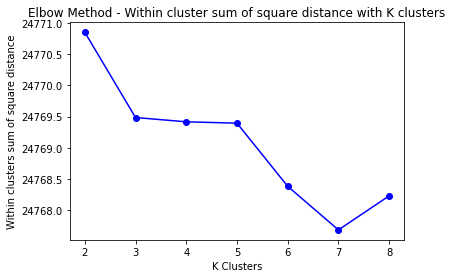

In [48]:
# When above k prototype algoirhtm has been run and completed - display k values as well as total distance
import matplotlib.pyplot as plt # use matplotlib library to display graph for elbow method
# Graph K and sum of square distance for each K
# Plot on line graph
plt.plot(kvalue, sumofsquaredistance, '-bo')
plt.title('Elbow Method - Within cluster sum of square distance with K clusters')
plt.xlabel('K Clusters')
plt.ylabel("Within clusters sum of square distance")

In [53]:
import time # To find time of function
# Based on graph use best K cluster to get result of select attributes of the data
bestkdistance = [] # List to store best k value distance
bestk = 3 # Best K cluster based on information above
starttime = time.time()
kprototype(df, bestkdistance, bestk, "accommodates", "bathrooms_text", "bedrooms", "beds", "amenities")
endtime = time.time()
print("Time for implemented algorithm with optimal K found was:", endtime - starttime)

----------------------------------------------------------------------------------------------------------------
K value: 3
Column Types (Index based on order of input):

Categorical columns: [1, 4]
Numerical columns: [0, 2, 3]
STARTING CLUSTERS:
    accommodates bathrooms_text  bedrooms  beds  \
0             2         1 bath       1.0   2.0   
31            5        3 baths       2.0   4.0   
64            4        2 baths       3.0   3.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       


Iteration: 2
Current clusters:
    accommodates bathrooms_text  bedrooms      beds  \
0      2.060537         1 bath  1.035402  1.099562   
1      7.365185        2 baths  3.111111  4.930370   
2      4.553563         1 bath  2.052489  2.594284   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

   accommodates bathrooms_text  bedrooms      beds  \
0      2.058399         1 bath  1.018475  1.160756   
1      6.691846        2 baths  2.989745  3.987494   
2      4.200975         1 bath  1.887465  2.320334   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [75]:
# Use library version of kprototype to compare
from kmodes.kprototypes import KPrototypes
import time # To find time of function
df2 = df[['accommodates','bathrooms_text','bedrooms','beds','amenities']].copy() # Get same attributes as implemented algorithm
# Run kprototype from library but with best k clusters found
kp = KPrototypes(n_clusters = 3, init = 'Huang', random_state = 0)
kp.fit_predict(df2, categorical = [1,4])


array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [76]:
kp.cluster_centroids_ # Show centroids and their values for each attribute

array([['1.9554691511994717', '1.0288313403271954', '1.1386545374513974',
        '1 bath', '[]'],
       ['4.18006304176517', '1.8379301287102705', '2.2605726293669557',
        '1 bath',
        '["Stove", "TV", "Single level home", "Dishes and silverware", "Air conditioning", "Hot water", "Kitchen", "Smoke alarm", "Extra pillows and blankets", "Cooking basics", "Oven", "Hair dryer", "Heating", "Shampoo", "Paid parking off premises", "Wifi", "Laptop-friendly workspace", "Refrigerator", "Long term stays allowed", "Dryer", "Elevator", "Iron", "Hangers", "Essentials", "Washer", "Bed linens", "Microwave", "Carbon monoxide alarm", "Patio or balcony", "Dishwasher"]'],
       ['6.7768472906403945', '2.9248768472906406', '4.006650246305418',
        '2 baths',
        '["Coffee maker", "Stove", "TV", "Free parking on premises", "Breakfast", "Crib", "Single level home", "Gym", "Children\\u2019s dinnerware", "Air conditioning", "Hot water", "Dishes and silverware", "Host greets you", "Carbon m

In [77]:
kp.n_iter_ # Number of iterations required for calculation

4

In [78]:
kp.cost_ # Get total cost (Within cluster distance)

56794.62951644274

In [79]:
df2['Cluster'] = kp.labels_ # Get labels from data
df2['ClusterID'] = df2['Cluster'].map({0:'1', 1:'2', 2:'3'}) # Give clusters appropriate labels

df2['ClusterID'] = df2['ClusterID'].astype('category') # Make ID a category to sort and group the data
df2['ClusterID'] = df2['ClusterID'].cat.reorder_categories(['1','2','3']) # Reorder based on assigned value
print(df2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [80]:
df2.rename(columns = {'Cluster':'Cluster Density'}, inplace=True) # Rename column
pd.set_option("display.max_rows", None, "display.max_columns", None) # show all columns
# Group data by cluster - display cluster density, and show mean for numerical attributes, and mode for categorical
result = df2.groupby('ClusterID').agg(
    {
    'Cluster Density': 'count', # Show count
    'accommodates': 'mean', # Show mean
    'bathrooms_text': lambda x: pd.Series.mode(x)[0], # show mode
    'bedrooms': 'mean', # show mean
    'beds': 'mean', # show mean
    'amenities': lambda x: pd.Series.mode(x)[0] # show mode
    
}
).reset_index()

result.head(3)

,ClusterID,Cluster Density,accommodates,bathrooms_text,bedrooms,beds,amenities
0,1,13631,1.955469,1 bath,1.028831,1.138655,[]
1,2,7614,4.180063,1 bath,1.837930,2.260573,"[""Stove"", ""TV"", ""Single level home"", ""Dishes and silverware"", ""Air conditioning"", ""Hot water"", ""Kitchen"", ""Smoke alarm"", ""Extra pillows and blankets"", ""Cooking basics"", ""Oven"", ""Hair dryer"", ""Heating"", ""Shampoo"", ""Paid parking off premises"", ""Wifi"", ""Laptop-friendly workspace"", ""Refrigerator"", ""Long term stays allowed"", ""Dryer"", ""Elevator"", ""Iron"", ""Hangers"", ""Essentials"", ""Washer"", ""Bed linens"", ""Microwave"", ""Carbon monoxide alarm"", ""Patio or balcony"", ""Dishwasher""]"
2,3,4060,6.776847,2 baths,2.924877,4.006650,"[""Coffee maker"", ""Stove"", ""TV"", ""Free parking on premises"", ""Breakfast"", ""Crib"", ""Single level home"", ""Gym"", ""Children\u2019s dinnerware"", ""Air conditioning"", ""Hot water"", ""Dishes and silverware"", ""Host greets you"", ""Carbon monoxide alarm"", ""Baking sheet"", ""Kitchen"", ""Smoke alarm"", ""Extra pillows and blankets"", ""Cooking basics"", ""Free street parking"", ""Oven"", ""Hair dryer"", ""Heating"", ""First aid kit"", ""Shower gel"", ""High chair"", ""Shampoo"", ""Wifi"", ""Laptop-friendly workspace"", ""Refrigerator"", ""BBQ grill"", ""Fire extinguisher"", ""Long term stays allowed"", ""Pack \u2019n Play/travel crib"", ""Cleaning before checkout"", ""Dryer"", ""Garden or backyard"", ""Elevator"", ""Iron"", ""Hangers"", ""Essentials"", ""Washer"", ""Bed linens"", ""Baby bath"", ""Pool"", ""Luggage dropoff allowed"", ""Microwave"", ""Children\u2019s books and toys"", ""Patio or balcony"", ""Dishwasher""]"


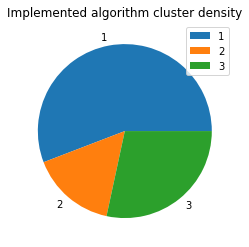

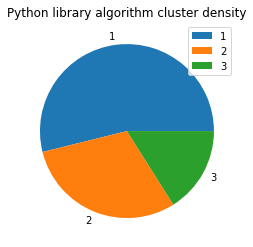

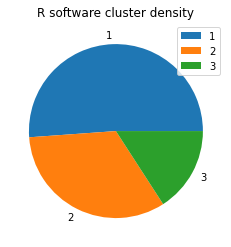

In [6]:
# Display additional graphs showing statistics
import matplotlib.pyplot as plt # use matplotlib library to display graph
clusternumber = [1,2,3]
implementedclusterdensity = [14127,3998,7180]
pythonlibraryclusterdensity = [13631,7614,4060]
rsoftwareclusterdensity = [12941,8350,4014]



# Create pie charts of all three cluster density values for each algorithm
plt.title("Implemented algorithm cluster density")
plt.pie(implementedclusterdensity, labels = clusternumber)
plt.legend()
plt.show()

plt.title("Python library algorithm cluster density")
plt.pie(pythonlibraryclusterdensity, labels = clusternumber)
plt.legend()
plt.show()

plt.title("R software cluster density")
plt.pie(rsoftwareclusterdensity, labels = clusternumber)
plt.legend()
plt.show()


